In [14]:
import numpy as np
import pandas as pd
%matplotlib inline

In [15]:
# Prepare data

heart_disease = pd.read_csv('heart-disease.csv')

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Chose the right model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = RandomForestClassifier(n_estimators=80)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Fit data to the model

model.fit(X_train,y_train);

# Evaluate the model
y_preds = model.predict(X_test)


model.score(X_test,y_test)

# np.random.seed(42)

# for i in range(10,100,10):
#     print(f"Trying model with {i} estimators!")
#     model = RandomForestClassifier(n_estimators=i)
    
#     model.fit(X_train,y_train)
    
    
#     print(f"Model accuracy on test sets: {model.score(X_test,y_test)*100}%")
#     print('')



0.9180327868852459

In [16]:
import pickle

pickle.dump(model,open('random_forest_model_2.pkl','wb'))

In [17]:
loaded_model = pickle.load(open('random_forest_model_2.pkl','rb'))

In [18]:
loaded_model.score(X_test,y_test)

0.9180327868852459

In [19]:
import sklearn

sklearn.__version__

'0.22.1'

In [20]:
sklearn.show_versions()


System:
    python: 3.8.2 (default, May  7 2020, 20:00:49)  [GCC 7.3.0]
executable: /home/mwibutsa/anaconda3/envs/ml_venv/bin/python
   machine: Linux-5.4.0-31-generic-x86_64-with-glibc2.10

Python dependencies:
       pip: 20.0.2
setuptools: 46.4.0.post20200518
   sklearn: 0.22.1
     numpy: 1.18.1
     scipy: 1.4.1
    Cython: None
    pandas: 1.0.3
matplotlib: 3.1.3
    joblib: 0.14.1

Built with OpenMP: True


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Choose the right model
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

model = RandomForestRegressor()
# Prepare the data

car_sales = pd.read_csv('car-sales-extended.csv')

# Split data into features X, and labels y

X = car_sales.drop('Price',axis=1)
y = car_sales['Price']

# Transform data into numerical values

categorical_features = ['Make','Colour','Doors']

one_hot_encoder = OneHotEncoder()

column_transformer = ColumnTransformer([('one_hot',one_hot_encoder,categorical_features)],
                                       remainder='passthrough')

transformed_X = column_transformer.fit_transform(X)

transformed_X




# Split the data into training and test data

X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)


# Fit the data into the model

model.fit(X_train,y_train)

# Evaluate the model

model.score(X_test,y_test)

0.26248703180617594

In [2]:
import pickle

pickle.dump(model,open('car_sales_model.pkl','wb'))

In [3]:
car_sales_model = pickle.load(open('car_sales_model.pkl','rb'))

In [4]:
car_sales_model.score(X_test,y_test)

0.26248703180617594

In [5]:
# Model Evaluation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

heart_disease  = pd.read_csv('heart-disease.csv')

# heart_disease.isna().sum()

np.random.seed(43)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2)

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train,y_train)

y_preds = model.predict_proba(X_test)
y_preds_positive = y_preds[:,1]

fpr,tpr, thresholds  = roc_curve(y_test,y_preds_positive)
model.score(X_test,y_test)

0.8852459016393442

In [73]:
def plot_roc_curve(fpr,tpr):
    
    plt.plot(fpr,tpr, color="orange", label="ROC")
    plt.xlabel('True positive rate (tpr)')
    plt.ylabel('False positive rate (fpr)')
    
    plt.title('AUC/ ROC curve')
    plt.plot([0,1],[0,1], color="darkblue", label="Guessing", linestyle='--')
    plt.legend()
    plt.show()

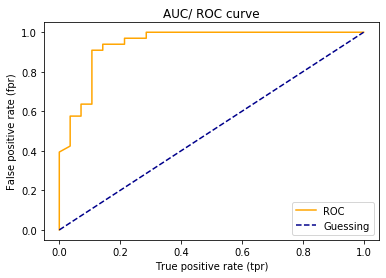

In [74]:
plot_roc_curve(fpr,tpr)

In [70]:
cross_val_score(model, X,y,cv=5).mean()

0.8314754098360657

In [75]:
roc_auc_score(y_test,y_preds_positive)

0.941017316017316